In [2]:
import os
from tqdm import tqdm
import cv2
import numpy as np
import random
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import h5py
import tensorflow as tf

In [3]:
train_data_dir = ('/Users/xiaoshuaiheng/Desktop/EE 628 DeepLearning/final proj/dogs-vs-cats/train/')
#test_data_dir = ('/Users/xiaoshuaiheng/Desktop/EE 628 DeepLearning/final proj/dogs-vs-cats/test/')
train_imageList = os.listdir('/Users/xiaoshuaiheng/Desktop/EE 628 DeepLearning/final proj/dogs-vs-cats/train')
#test_imageList = os.listdir('/Users/xiaoshuaiheng/Desktop/EE 628 DeepLearning/final proj/dogs-vs-cats/test')

In [4]:
def data_augment(image):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_hue(image, 0.01)
    image = tf.image.random_saturation(image, 0.7, 1.3)
    image = tf.image.random_contrast(image, 0.8, 1.2)
    #image = tf.image.random_brightness(image, 0.1)
    return image   

In [5]:
def create_dataset(data_dir, imageList, image_size, counter, dataset):
    for image_name in tqdm(imageList):
        image_path = os.path.join(data_dir,image_name)
        category = image_name[:3]
        if category == 'dog':
            label = 1
            counter[1] += 1
        elif category == 'cat':
            label = 0
            counter[0] += 1
        try:
            image = cv2.imread(image_path, cv2.IMREAD_COLOR)
            image = cv2.resize(image, (image_size, image_size))
            dataset.append([np.array(image), np.array(label)])
            new_image = data_augment(image)
            dataset.append([np.array(new_image),np.array(label)])
        except:
            continue
    return dataset

In [6]:
image_size = 224
counter = [0,0]
train_dataset = []
train_dataset = create_dataset(train_data_dir, train_imageList, image_size, counter, train_dataset)

100%|██████████| 25001/25001 [02:08<00:00, 194.99it/s]


In [7]:
print(len(train_dataset))

50000


In [8]:
random.shuffle(train_dataset)
random.shuffle(train_dataset)

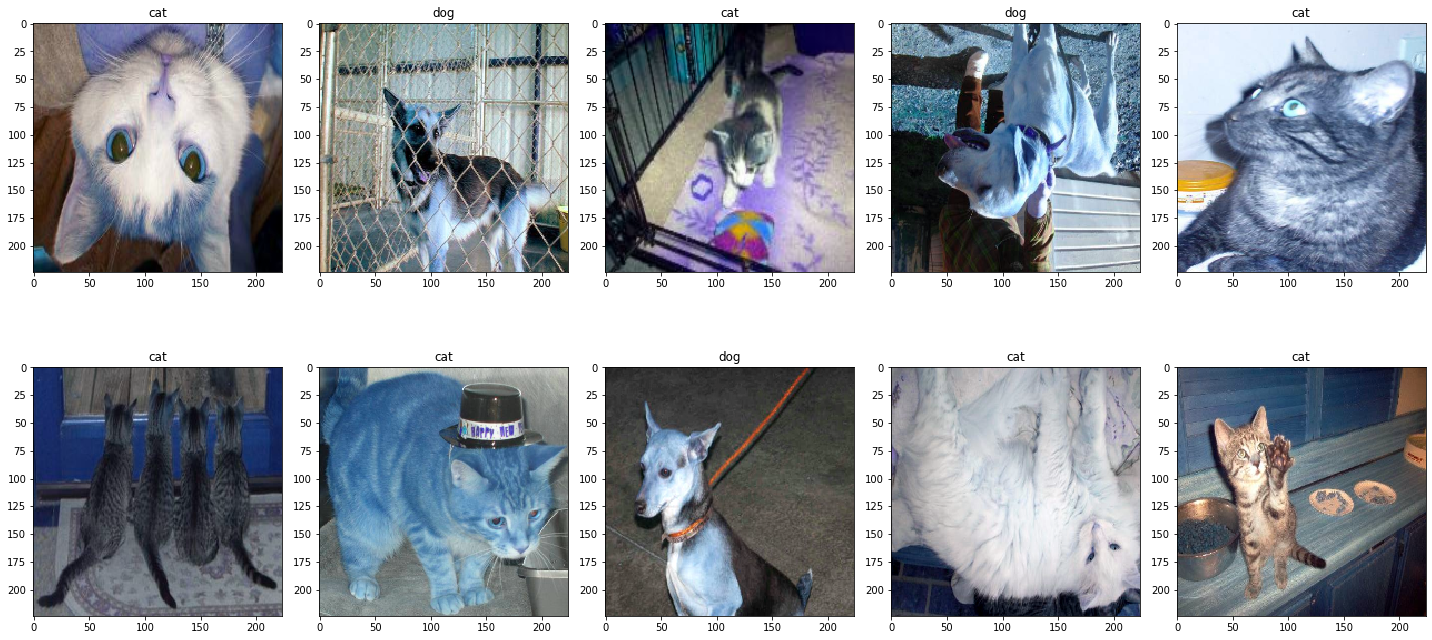

In [12]:
plt.figure(figsize = (20,10))
for i in range(10):
    sample = random.choice(range(len(train_dataset)))
    plt.subplot(2,5,i+1)
    image, label = train_dataset[sample][0], train_dataset[sample][1]
    plt.imshow(image)
    if label == 1:
        plt.title('dog')
    else:
        plt.title('cat')
plt.tight_layout()

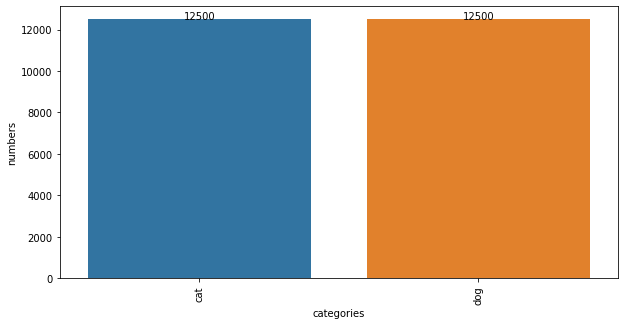

In [13]:
df_counter = pd.DataFrame()
df_counter['categories'] = ['cat', 'dog']
df_counter['numbers'] = counter
plt.figure(figsize = (10,5))
plt.xticks(rotation = 90)
seaborn.barplot(x = 'categories', y = 'numbers', data = df_counter)
for index,value in enumerate(counter):
    plt.text(x = index, y = value, s = value, color = 'black', ha = 'center')
plt.show()

In [14]:
train_dataset = train_dataset[:10000]

In [15]:
def split_data(dataset):
    x = np.array([i[0] for i in dataset]).reshape(-1, 224, 224, 3)
    y = np.array([i[1] for i in dataset])
    x_train_val, x_test, y_train_val, y_test = train_test_split(x,y,test_size = 0.1)
    x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size = 0.2)
    return x_train, y_train, x_val, y_val, x_test, y_test

In [16]:
x_train, y_train, x_val, y_val, x_test, y_test = split_data(train_dataset)

In [17]:
print(len(x_train))
print(len(x_val))
print(len(x_test))
print(len(y_train))
print(len(y_val))
print(len(y_test))

7200
1800
1000
7200
1800
1000


In [18]:
f = h5py.File('/Users/xiaoshuaiheng/Desktop/EE 628 DeepLearning/final proj/dataset.hdf5',mode = 'w')

In [19]:
def save_data_as_h5py(x_train, y_train, x_val, y_val, x_test, y_test,lst):
    f.create_dataset(name = lst[0],shape = (len(x_train),224,224,3), dtype = 'i', data = x_train)
    f.create_dataset(name = lst[1],shape = (len(y_train),), dtype = 'i', data = y_train)
    f.create_dataset(name = lst[2],shape = (len(x_val),224,224,3), dtype = 'i', data = x_val)
    f.create_dataset(name = lst[3],shape = (len(y_val),), dtype = 'i', data = y_val)
    f.create_dataset(name = lst[4],shape = (len(x_test),224,224,3), dtype = 'i', data = x_test)
    f.create_dataset(name = lst[5],shape = (len(y_test),), dtype = 'i', data = y_test)

In [20]:
lst = ['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']
save_data_as_h5py(x_train, y_train, x_val, y_val, x_test, y_test,lst)

In [21]:
f.close()